# Title : See Click Fix Prediction

# Problem statement : Predicting number of views,votes and comments for a given complaint, based on previous data

# Team No : 7D2

Team members:

Vishal Bhandage  -  339

Rahul H - 359

Aditi M - 347

Vinith A - 338

In [9]:
#importing libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#Reading .csv file
train_data = pd.read_csv("Train_Data_7D2.csv",header = 0, index_col = None)
train_data.head()

Populating the interactive namespace from numpy and matplotlib


,id,latitude,longitude,summary,description,num_votes,num_comments,num_views,source,created_time,tag_type
0,368683,37.590139,-77.456841,Alleyway light out.,There is a streetlight lamp out in the alleywa...,4,0,62,New Map Widget,2012-01-01 01:20:08,street_light
1,77642,37.541534,-77.451985,brick side walk has sink hole,bricks are falling into deep hole. please rep...,2,2,28,NaN,2012-01-01 03:18:40,pothole
2,335652,37.560369,-77.468661,Graffiti,This is the rear parking lot of the former Jul...,4,2,36,New Map Widget,2012-01-01 03:39:48,graffiti
3,339096,37.553762,-77.474736,Non-functioning Traffic Lights,Walking man out on nb side of blvd southward w...,2,0,29,android,2012-01-01 13:59:41,traffic
4,343122,37.538814,-77.437136,Pothole in Crosswalk,Going from South to North in front of Wells Fa...,2,0,18,New Map Widget,2012-01-01 14:05:30,pothole


# Pre-Processing

In [10]:
#Droping id as there is no correlation between id and result rows
#Since Pearson Correlation says that 'id'has very less correlation with result i.e num_of_votes, it is dropped
from scipy.stats.stats import pearsonr
pearsonr(train_data['id'], train_data['num_votes'])


(0.0043884688783858644, 0.13886848350709707)

In [11]:
pearsonr(train_data['id'], train_data['num_comments'])

(0.0045026525118740494, 0.12888163881116008)

In [12]:
pearsonr(train_data['id'], train_data['num_views'])

(0.00599382173966404, 0.043234859937169343)

In [13]:
train_data.drop('id', axis = 1, inplace = True)

In [14]:
#Fill null values of description
train_data['description'].fillna("NA", inplace = True)
train_data['source'].fillna("NA", inplace = True)
train_data['tag_type'].fillna("Others", inplace = True)

In [15]:
train_data.describe()

,latitude,longitude,num_votes,num_comments,num_views
count,113740.000000,113740.000000,113740.000000,113740.000000,113740.000000
mean,40.299794,-87.503798,1.632302,0.119703,13.899666
std,2.022245,12.263621,1.371140,0.933540,39.753656
min,37.451097,-122.342204,1.000000,0.000000,0.000000
25%,37.583290,-87.719542,1.000000,0.000000,0.000000
50%,41.749169,-87.659942,1.000000,0.000000,1.000000
75%,41.884922,-77.484479,2.000000,0.000000,14.000000
max,42.022533,-72.862229,134.000000,86.000000,4381.000000


In [16]:
latitudes = train_data["latitude"]
longitudes = train_data["longitude"]

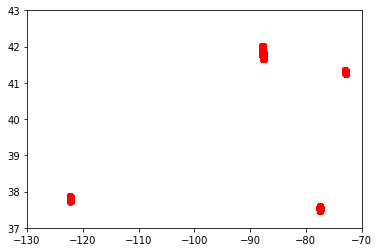

In [17]:
#We can infer from the graphs that there are four cities in given table.
#Oakland = Longitude(100<x)
#Chicago = Longitude(90<x<80)
#Richmond = Longitude(80<x<75)
#New Haven = Longitude(x<75)
plt.plot(longitudes,latitudes, 'ro')
plt.axis([-130, -70, 37, 43])
plt.show()

In [18]:
#Function to convert latitude and longitude to cities
cit = []
def get_city(lat,lon):
    if(lon < -100.0):
        cit = 'Oakland'
    elif (-90.0 < lon and lon < -80.0):
        cit = 'Chicago'
    elif (-80.0 < lon and lon < -75.0):
        cit = 'Richmond'
    else:
        cit = 'New_Haven'
    return cit

In [19]:
#Calling above function for conversion
i = 0
for lat,long in zip(latitudes,longitudes):
    i = i+1
    cit.insert(i,get_city(lat,long))


In [20]:
#Inserting 'city' attribute
train_data['city'] = pd.Series(cit, index=train_data.index)

In [21]:
#Dropping lattitude and longitude as they are replaced by city attribute
train_data.drop('latitude', axis = 1, inplace = True)
train_data.drop('longitude', axis = 1, inplace = True)

In [22]:
train_data.head()

,summary,description,num_votes,num_comments,num_views,source,created_time,tag_type,city
0,Alleyway light out.,There is a streetlight lamp out in the alleywa...,4,0,62,New Map Widget,2012-01-01 01:20:08,street_light,Richmond
1,brick side walk has sink hole,bricks are falling into deep hole. please rep...,2,2,28,NA,2012-01-01 03:18:40,pothole,Richmond
2,Graffiti,This is the rear parking lot of the former Jul...,4,2,36,New Map Widget,2012-01-01 03:39:48,graffiti,Richmond
3,Non-functioning Traffic Lights,Walking man out on nb side of blvd southward w...,2,0,29,android,2012-01-01 13:59:41,traffic,Richmond
4,Pothole in Crosswalk,Going from South to North in front of Wells Fa...,2,0,18,New Map Widget,2012-01-01 14:05:30,pothole,Richmond


In [23]:
#Converting summary and description to their length
#Numerical data required for prediction and learning models
summary = train_data["summary"]
desc = train_data["description"]
sumLen = []
descLen = []
i = 0
test = "NA"
for sumr,des in zip(summary,desc):
    if(des != "NA"):
        sumLen.insert(i,len(sumr))
        descLen.insert(i,len(des))
        i = i + 1
    else:
        sumLen.insert(i,len(sumr))
        descLen.insert(i,-1)
        i = i + 1

In [24]:
#Adding Summary and Description length attributes
train_data['summary_Len'] = pd.Series(sumLen, index=train_data.index)
train_data['description_len'] = pd.Series(descLen, index=train_data.index)

In [25]:
#Droping Summary and Description attributes since length is obtained
train_data.drop('summary', axis = 1, inplace = True)
train_data.drop('description', axis = 1, inplace = True)

In [26]:
#One hot-encoding function
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())
    for category in categories:
        cat_name = str(category).replace(" ", "_").lower()
        col_name = column_to_convert + '_' + cat_name
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1
    return df

In [27]:
#Number of unique values in 'tag_type' attribute
len(train_data.tag_type.unique())

42

In [28]:
#Numerical data is required for efficient implementation of learning techniques
#One hot-encoding for 'tag_type' attribute
train_data = convert_to_binary(df=train_data, column_to_convert='tag_type')
train_data.drop('tag_type', axis=1, inplace=True)

In [29]:
#Number of unique values in 'city' attribute
len(train_data.city.unique())

4

In [30]:
#One hot-encoding for 'tag_type' attribute
train_data = convert_to_binary(df=train_data, column_to_convert='city')
train_data.drop('city', axis=1, inplace=True)

In [31]:
#Number of unique values in 'source' attribute
len(train_data.source.unique())

8

In [32]:
#One hot-encoding for 'tag_type' attribute
train_data = convert_to_binary(df=train_data, column_to_convert='source')
train_data.drop('source', axis=1, inplace=True)

In [33]:
created_time = train_data['created_time']

In [34]:
#Convert type of created_time attribute to timestamp
train_data['created_time'] = pd.to_datetime(train_data['created_time'], format='%Y-%m-%d')

In [35]:
#Copying month and day of month values to variables
day_of_month,month = train_data['created_time'].dt.day, train_data['created_time'].dt.month

In [36]:
#Extracting day of the year and day of the week from created time
#This is done as learning model can use numerical data for prediction
#year_day stores day of the year from 1 to 366(2012 is a leap year)
#week_day stores day of the week from 1 to 7 (1 is Sunday)
year_day = []
week_day = []
day_months = [31,29,31,30,31,30,31,31,30,31,30,31]
i = 0
for day in day_of_month:
    j = 0
    add = 0
    while (j < (month[i]-1)):
        add = add + day_months[j]
        j = j+1
    year_day.insert(i,day + (add))
    w_day = year_day[i] % 7
    week_day.insert(i,w_day+1)
    i = i+1

In [37]:
#Adding 'year_day' and 'week_day'
train_data['year_day'] = pd.Series(year_day, index=train_data.index)
train_data['week_day'] = pd.Series(week_day, index=train_data.index)

In [38]:
#Dropping 'created_time' attribute since we extracted required information
train_data.drop('created_time', axis=1, inplace=True)

In [39]:
file_name = "PreProcess.csv"
train_data.to_csv(file_name, sep='\t', encoding='utf-8')

In [40]:
train_data.head()

,num_votes,num_comments,num_views,summary_Len,description_len,tag_type_street_light,tag_type_pothole,tag_type_graffiti,tag_type_traffic,tag_type_trash,...,source_new_map_widget,source_na,source_android,source_map_widget,source_iphone,source_remote_api_created,source_mobile_site,source_city_initiated,year_day,week_day
0,4,0,62,19,296,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,2,2,28,29,150,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,2
2,4,2,36,8,331,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,2
3,2,0,29,30,53,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,2
4,2,0,18,20,78,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,2


# Learning Techniques 
We have used different regression techniques for our data as our predictions are numerical values

In [41]:
#Creating separate data frame for prediction of number of votes
#Attributes 'num_views' and 'num_comments' are dropped as they are result attributes
df_num_votes = train_data.copy(deep = True)
df_num_votes.drop('num_views', axis=1, inplace=True)
df_num_votes.drop('num_comments', axis=1, inplace=True)

In [42]:
df_num_votes.head()

,num_votes,summary_Len,description_len,tag_type_street_light,tag_type_pothole,tag_type_graffiti,tag_type_traffic,tag_type_trash,tag_type_others,tag_type_signs,...,source_new_map_widget,source_na,source_android,source_map_widget,source_iphone,source_remote_api_created,source_mobile_site,source_city_initiated,year_day,week_day
0,4,19,296,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,2,29,150,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
2,4,8,331,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
3,2,30,53,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2
4,2,20,78,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2


In [43]:
#Creating separate data frame for prediction of number of comments
#Attributes 'num_views' and 'num_votes' are dropped as they are result attributes
df_num_comments = train_data.copy(deep = True)
df_num_comments.drop('num_votes', axis=1, inplace=True)
df_num_comments.drop('num_views', axis=1, inplace=True)

In [44]:
df_num_comments.head()

,num_comments,summary_Len,description_len,tag_type_street_light,tag_type_pothole,tag_type_graffiti,tag_type_traffic,tag_type_trash,tag_type_others,tag_type_signs,...,source_new_map_widget,source_na,source_android,source_map_widget,source_iphone,source_remote_api_created,source_mobile_site,source_city_initiated,year_day,week_day
0,0,19,296,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,2,29,150,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
2,2,8,331,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
3,0,30,53,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2
4,0,20,78,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2


In [45]:
#Creating separate data frame for prediction of number of views
#Attributes 'num_votes' and 'num_comments' are dropped as they are result attributes
df_num_views = train_data.copy(deep = True)
df_num_views.drop('num_votes', axis=1, inplace=True)
df_num_views.drop('num_comments', axis=1, inplace=True)

In [46]:
df_num_views.head()

,num_views,summary_Len,description_len,tag_type_street_light,tag_type_pothole,tag_type_graffiti,tag_type_traffic,tag_type_trash,tag_type_others,tag_type_signs,...,source_new_map_widget,source_na,source_android,source_map_widget,source_iphone,source_remote_api_created,source_mobile_site,source_city_initiated,year_day,week_day
0,62,19,296,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,28,29,150,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
2,36,8,331,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2
3,29,30,53,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2
4,18,20,78,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2


# Learning Models

    Model Evaluation in four different categories:

    1. Underfitting – Validation and training error high
    2. Overfitting – Validation error is high, training error low
    3. Good fit – Validation error low, slightly higher than the training error
    4. Unknown fit - Validation error low, training error 'high'

In [48]:
#Storing y(dependent attribute) and x(independent attributes)
y = df_num_votes['num_votes']
cols = pd.Series(df_num_votes.columns)
col = cols.drop(cols.index[0])
x = df_num_votes[col]

# Multiple Linear Regression

In [60]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

lin_reg_data = pd.DataFrame(columns=['Modelname','trainingerror','validationerror'])
res = pd.DataFrame(columns=['size','test_rmse','train_rmse','r_square'])

count=1

f = 0.1

rmlse_test = []
rmlse_train = []
err_test = []
err_train = []
size = []
testrm = []
trainrm=[]
rsq=[]
option=['true','false']
for norm in option:
    for inter in option:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
        regr_train = linear_model.LinearRegression(normalize = norm,fit_intercept = inter)
        regr_train.fit(x_train, y_train)
        predicted_test = regr_train.predict(x_test)
        predicted_train = regr_train.predict(x_train)
        err_test.append(mean_absolute_error(y_test,predicted_test))
        err_train.append(mean_absolute_error(y_train,predicted_train))
        #RMLSE_test = np.sqrt(np.square(np.log(predicted_test + 1) - np.log(y_test + 1)).mean())
        #RMLSE_train = np.sqrt(np.square(np.log(predicted_train + 1) - np.log(y_train + 1)).mean())
        #r_square = r2_score(y_test,predicted_test)
        
        #v = int(f*100)
        #size.append(v)
        #testrm.append(RMLSE_test)
        #trainrm.append(RMLSE_train)
        #rsq.append(r_square)
        
        #print("For Sample:",v,"%%  Test RMLSE: %.3f" % RMLSE_test,"%%  Train RMLSE: %.3f"%RMLSE_train," R_square: ",r_square)

        #f=f+0.1
        
        mdlname="Model"+str(count)+"__normalize="+str(norm)+"__fit_intercept="+str(inter)
        lin_reg_data = lin_reg_data.append({'Modelname':mdlname ,'trainingerror': np.average(err_train),'validationerror': np.average(err_test)}, ignore_index=True)
        count=count+1       
#res['size']=size
#res['test_rmse']=testrm
#res['train_rmse']=trainrm
#res['r_square']=rsq
     

#res

In [61]:
lin_reg_data

,Modelname,trainingerror,validationerror
0,Model1__normalize=true__fit_intercept=true,0.34804,3.683894e+06
1,Model2__normalize=true__fit_intercept=false,0.34804,3.683894e+06
2,Model3__normalize=false__fit_intercept=true,0.34804,3.683894e+06
3,Model4__normalize=false__fit_intercept=false,0.34804,3.683894e+06


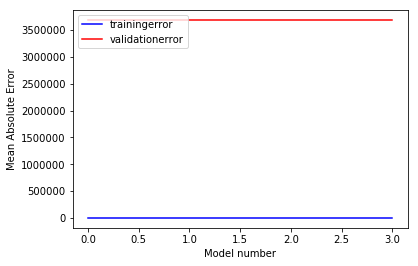

In [114]:
plt.plot( lin_reg_data['trainingerror'], 'b') # plotting t, a separately 
plt.plot( lin_reg_data['validationerror'], 'red') # plotting t, b separately 
plt.legend(['trainingerror', 'validationerror'], loc='upper left')
plt.show(xlabel('Model number'),ylabel('Mean Absolute Error'))

In [63]:
lin_reg_data.loc[lin_reg_data['validationerror']-lin_reg_data['trainingerror'] == min(lin_reg_data['validationerror']-lin_reg_data['trainingerror'])]

,Modelname,trainingerror,validationerror
0,Model1__normalize=true__fit_intercept=true,0.34804,3.683894e+06
1,Model2__normalize=true__fit_intercept=false,0.34804,3.683894e+06
2,Model3__normalize=false__fit_intercept=true,0.34804,3.683894e+06
3,Model4__normalize=false__fit_intercept=false,0.34804,3.683894e+06


In [71]:
size=[0.1,0.2,0.3,0.4,0.5]
for norm in option:
    for inter in option:
        print("Model for normalization = ",norm," Fit Intercept = ",inter)
        print()
        for f in size:    
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = f,random_state=42)
            regr_train = linear_model.LinearRegression(normalize = norm, fit_intercept = inter)
            regr_train.fit(x_train, y_train)
            predicted_test = regr_train.predict(x_test)
            predicted_train = regr_train.predict(x_train)
            RMLSE_test = np.sqrt(np.square(np.log(predicted_test + 1) - np.log(y_test + 1)).mean())
            RMLSE_train = np.sqrt(np.square(np.log(predicted_train + 1) - np.log(y_train + 1)).mean())
            r_square = r2_score(y_test,predicted_test)
            print("For Sample:",(f*100),"%%  Test RMLSE: %.3f" % RMLSE_test,"  Train RMLSE: %.3f"%RMLSE_train," R_square: ",r_square)
        print()

Model for normalization =  true  Fit Intercept =  true

For Sample: 10.0 %  Test RMLSE: 0.326   Train RMLSE: 0.181  R_square:  -1.40087927248e+23
For Sample: 20.0 %  Test RMLSE: 0.260   Train RMLSE: 0.180  R_square:  -5.53667039765e+21


/home/vinith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


For Sample: 30.0 %  Test RMLSE: 0.183   Train RMLSE: 0.180  R_square:  -2.58088588553e+17
For Sample: 40.0 %  Test RMLSE: 0.182   Train RMLSE: 0.180  R_square:  -1.11720984823e+22
For Sample: 50.0 %  Test RMLSE: 0.201   Train RMLSE: 0.180  R_square:  -1.54101713448e+15

Model for normalization =  true  Fit Intercept =  false

For Sample: 10.0 %  Test RMLSE: 0.326   Train RMLSE: 0.181  R_square:  -1.40087927248e+23
For Sample: 20.0 %  Test RMLSE: 0.260   Train RMLSE: 0.180  R_square:  -5.53667039765e+21
For Sample: 30.0 %  Test RMLSE: 0.183   Train RMLSE: 0.180  R_square:  -2.58088588553e+17
For Sample: 40.0 %  Test RMLSE: 0.182   Train RMLSE: 0.180  R_square:  -1.11720984823e+22
For Sample: 50.0 %  Test RMLSE: 0.201   Train RMLSE: 0.180  R_square:  -1.54101713448e+15

Model for normalization =  false  Fit Intercept =  true

For Sample: 10.0 %  Test RMLSE: 0.326   Train RMLSE: 0.181  R_square:  -1.40087927248e+23
For Sample: 20.0 %  Test RMLSE: 0.260   Train RMLSE: 0.180  R_square:  -5.

In [91]:
models = pd.DataFrame(columns = ['Model_Name','score(RMLSE)'])
models = models.append({'Model_Name':"Multiple Linear Regression",'score(RMLSE)':0.182},ignore_index = True)

There is a large diffenrce between validation error and training error.
Validation Error is high and Training Error is low, which denotes that 

# Ridge Regression

In [79]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np


rid_reg_data = pd.DataFrame(columns=['Modelname','trainingerror','validationerror'])
count=1

err_test = []
err_train = []

alphas=list(np.arange(0.01, 1.0, 0.01))
for op1 in alphas:
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
    regr_train = linear_model.Ridge (alpha = float(op1))
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    err_test.append(mean_absolute_error(y_test,predicted_test))
    err_train.append(mean_absolute_error(y_train,predicted_train))
    mdlname="Model"+str(count)+"__aplha="+str(op1)
    rid_reg_data = rid_reg_data.append({'Modelname':mdlname ,'trainingerror': np.average(err_train),'validationerror': np.average(err_test)},ignore_index=True)
    count=count+1       
        
     




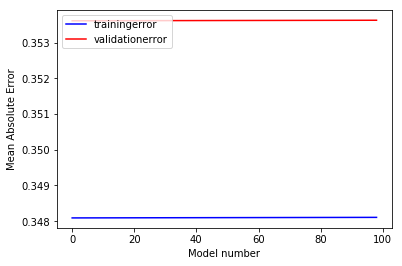

In [115]:
plt.plot( rid_reg_data['trainingerror'], 'b') # plotting t, a separately 
plt.plot( rid_reg_data['validationerror'], 'red') # plotting t, b separately 
plt.legend(['trainingerror', 'validationerror'], loc='upper left')
plt.show(xlabel('Model number'),ylabel('Mean Absolute Error'))

In [82]:
rid_reg_data

,Modelname,trainingerror,validationerror
0,Model1__aplha=0.01,0.348092,0.353608
1,Model2__aplha=0.02,0.348092,0.353608
2,Model3__aplha=0.03,0.348092,0.353608
3,Model4__aplha=0.04,0.348092,0.353608
4,Model5__aplha=0.05,0.348092,0.353608
5,Model6__aplha=0.06,0.348093,0.353608
6,Model7__aplha=0.07,0.348093,0.353609
7,Model8__aplha=0.08,0.348093,0.353609
8,Model9__aplha=0.09,0.348093,0.353609
9,Model10__aplha=0.1,0.348093,0.353609


In [83]:
rid_reg_data.loc[rid_reg_data['validationerror']-rid_reg_data['trainingerror'] == min(rid_reg_data['validationerror']-rid_reg_data['trainingerror'])]

,Modelname,trainingerror,validationerror
36,Model37__aplha=0.37,0.348098,0.353613


In [84]:
from sklearn.linear_model import Ridge
size=[0.1,0.2,0.3,0.4,0.5]
for f in size:    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=f,random_state=42)
    regr_train = linear_model.Ridge (alpha = 0.37)
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    RMLSE_test = np.sqrt(np.square(np.log(predicted_test + 1) - np.log(y_test + 1)).mean())
    RMLSE_train = np.sqrt(np.square(np.log(predicted_train + 1) - np.log(y_train + 1)).mean())
    r_square = r2_score(y_test,predicted_test)
    print("For Sample:%.1f",(f*100),"%%  Test RMLSE: %.3f" % RMLSE_test,"%%  Train RMLSE: %.3f"%RMLSE_train," R_square: ",r_square)


For Sample:%.1f 10.0 %  Test RMLSE: 0.179 %  Train RMLSE: 0.181  R_square:  0.423633612029
For Sample:%.1f 20.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.180  R_square:  0.395054123194
For Sample:%.1f 30.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.180  R_square:  0.422738828572
For Sample:%.1f 40.0 %  Test RMLSE: 0.182 %  Train RMLSE: 0.180  R_square:  0.440175293741
For Sample:%.1f 50.0 %  Test RMLSE: 0.181 %  Train RMLSE: 0.180  R_square:  0.45448782222


In [92]:
models = models.append({'Model_Name':"Ridge Regression",'score(RMLSE)':0.179},ignore_index = True)

,Model_Name,score(RMLSE)
0,Multiple Linear Regression,0.182
1,Ridge Regression,0.179


# Elastic Net Regression

In [94]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error
import numpy as np


elst_net_data = pd.DataFrame(columns=['Modelname','trainingerror','validationerror'])
count=1

err_test = []
err_train = []

alphas=list(np.arange(0.01, 1.0, 0.01))
for op1 in alphas:
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
    regr_train = ElasticNet (alpha = float(op1))
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    err_test.append(mean_absolute_error(y_test,predicted_test))
    err_train.append(mean_absolute_error(y_train,predicted_train))
    mdlname="Model"+str(count)+"__aplha="+str(op1)
    elst_net_data = elst_net_data.append({'Modelname':mdlname ,'trainingerror': np.average(err_train),'validationerror': np.average(err_test)},ignore_index=True)
    count=count+1       
        
     




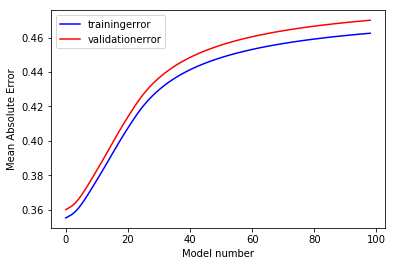

In [116]:
plt.plot( elst_net_data['trainingerror'], 'b') # plotting t, a separately 
plt.plot( elst_net_data['validationerror'], 'red') # plotting t, b separately 
plt.legend(['trainingerror', 'validationerror'], loc='upper left')
plt.show(xlabel('Model number'),ylabel('Mean Absolute Error'))

In [96]:
elst_net_data

,Modelname,trainingerror,validationerror
0,Model1__aplha=0.01,0.355248,0.360036
1,Model2__aplha=0.02,0.356236,0.361097
2,Model3__aplha=0.03,0.357273,0.362235
3,Model4__aplha=0.04,0.358767,0.363827
4,Model5__aplha=0.05,0.360755,0.365911
5,Model6__aplha=0.06,0.363078,0.368321
6,Model7__aplha=0.07,0.365670,0.371003
7,Model8__aplha=0.08,0.368462,0.373894
8,Model9__aplha=0.09,0.371378,0.376913
9,Model10__aplha=0.1,0.374307,0.379936


In [97]:
elst_net_data.loc[elst_net_data['validationerror']-elst_net_data['trainingerror'] == min(elst_net_data['validationerror']-elst_net_data['trainingerror'])]

,Modelname,trainingerror,validationerror
0,Model1__aplha=0.01,0.355248,0.360036


In [98]:
size=[0.1,0.2,0.3,0.4,0.5]
for f in size:    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=f,random_state=42)
    regr_train = ElasticNet (alpha = 0.01)
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    RMLSE_test = np.sqrt(np.square(np.log(predicted_test + 1) - np.log(y_test + 1)).mean())
    RMLSE_train = np.sqrt(np.square(np.log(predicted_train + 1) - np.log(y_train + 1)).mean())
    r_square = r2_score(y_test,predicted_test)
    print("For Sample:",(f*100),"%%  Test RMLSE: %.3f" % RMLSE_test,"%%  Train RMLSE: %.3f"%RMLSE_train," R_square: ",r_square)


For Sample: 10.0 %  Test RMLSE: 0.180 %  Train RMLSE: 0.182  R_square:  0.409029384416
For Sample: 20.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.181  R_square:  0.385606860122
For Sample: 30.0 %  Test RMLSE: 0.184 %  Train RMLSE: 0.181  R_square:  0.412648034483
For Sample: 40.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.181  R_square:  0.430555706311
For Sample: 50.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.182  R_square:  0.443007910372


In [99]:
models = models.append({'Model_Name':"Elastic Net",'score(RMLSE)':0.180},ignore_index = True)

# Lasso Regression

In [100]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error
import numpy as np


las_reg_data = pd.DataFrame(columns=['Modelname','trainingerror','validationerror'])
count=1

err_test = []
err_train = []

alphas=list(np.arange(0.01, 1.0, 0.01))
for op1 in alphas:
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
    regr_train = linear_model.Lasso (alpha = float(op1))
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    err_test.append(mean_absolute_error(y_test,predicted_test))
    err_train.append(mean_absolute_error(y_train,predicted_train))
    mdlname="Model"+str(count)+"__aplha="+str(op1)
    las_reg_data = las_reg_data.append({'Modelname':mdlname ,'trainingerror': np.average(err_train),'validationerror': np.average(err_test)},ignore_index=True)
    count=count+1       
        
     


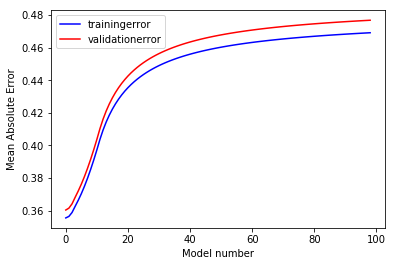

In [117]:
plt.plot( las_reg_data['trainingerror'], 'b') # plotting t, a separately 
plt.plot( las_reg_data['validationerror'], 'red') # plotting t, b separately 
plt.legend(['trainingerror', 'validationerror'], loc='upper left')
plt.show(xlabel('Model number'),ylabel('Mean Absolute Error'))

In [102]:
las_reg_data

,Modelname,trainingerror,validationerror
0,Model1__aplha=0.01,0.355577,0.360422
1,Model2__aplha=0.02,0.356505,0.361567
2,Model3__aplha=0.03,0.358858,0.364165
3,Model4__aplha=0.04,0.362629,0.368152
4,Model5__aplha=0.05,0.366350,0.372045
5,Model6__aplha=0.06,0.370411,0.376256
6,Model7__aplha=0.07,0.374924,0.380895
7,Model8__aplha=0.08,0.379891,0.385982
8,Model9__aplha=0.09,0.385286,0.391491
9,Model10__aplha=0.1,0.391076,0.397401


In [103]:
las_reg_data.loc[las_reg_data['validationerror']-las_reg_data['trainingerror'] == min(las_reg_data['validationerror']-las_reg_data['trainingerror'])]

,Modelname,trainingerror,validationerror
0,Model1__aplha=0.01,0.355577,0.360422


In [104]:
size=[0.1,0.2,0.3,0.4,0.5]
for f in size:    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=f,random_state=42)
    regr_train = linear_model.Lasso (alpha = 0.01)
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    RMLSE_test = np.sqrt(np.square(np.log(predicted_test + 1) - np.log(y_test + 1)).mean())
    RMLSE_train = np.sqrt(np.square(np.log(predicted_train + 1) - np.log(y_train + 1)).mean())
    r_square = r2_score(y_test,predicted_test)
    print("For Sample:",(f*100),"%%  Test RMLSE: %.3f" % RMLSE_test,"%%  Train RMLSE: %.3f"%RMLSE_train," R_square: ",r_square)


For Sample: 10.0 %  Test RMLSE: 0.180 %  Train RMLSE: 0.182  R_square:  0.406366813356
For Sample: 20.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.181  R_square:  0.383597787561
For Sample: 30.0 %  Test RMLSE: 0.184 %  Train RMLSE: 0.181  R_square:  0.410204590328
For Sample: 40.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.181  R_square:  0.42817556572
For Sample: 50.0 %  Test RMLSE: 0.183 %  Train RMLSE: 0.182  R_square:  0.440357830741


In [105]:
models = models.append({'Model_Name':"Lasso Regression",'score(RMLSE)':0.180},ignore_index = True)

# Decision Tree Regressor

In [106]:
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

dec_tree_reg_data = pd.DataFrame(columns=['Modelname','trainingerror','validationerror'])
count=1
err_test = []
err_train = []

for depth in range(1,20):
    
    for split in range(2,5):
        
        err_test = []
        err_train = []
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
        regr_train = DecisionTreeRegressor(max_depth = depth, min_samples_split = split)
        regr_train.fit(x_train, y_train)
        predicted_test = regr_train.predict(x_test)
        predicted_train = regr_train.predict(x_train)
        err_test.append(mean_absolute_error(y_test,predicted_test))
        err_train.append(mean_absolute_error(y_train,predicted_train))
  
        mdlname="Model"+str(count)+"_depth="+str(depth)+"_min_samples_split="+str(split)
        dec_tree_reg_data = dec_tree_reg_data.append({'Modelname':mdlname ,'trainingerror': np.average(err_train),'validationerror': np.average(err_test)}, ignore_index=True)
        count=count+1
        
     

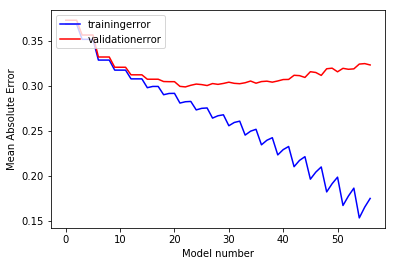

In [118]:
plt.plot( dec_tree_reg_data['trainingerror'], 'b') # plotting t, a separately 
plt.plot( dec_tree_reg_data['validationerror'], 'red') # plotting t, b separately 
plt.legend(['trainingerror', 'validationerror'], loc='upper left')
plt.show(xlabel('Model number'),ylabel('Mean Absolute Error'))

In [108]:
dec_tree_reg_data

,Modelname,trainingerror,validationerror
0,Model1_depth=1_min_samples_split=2,0.368494,0.372911
1,Model2_depth=1_min_samples_split=3,0.368494,0.372911
2,Model3_depth=1_min_samples_split=4,0.368494,0.372911
3,Model4_depth=2_min_samples_split=2,0.351720,0.356520
4,Model5_depth=2_min_samples_split=3,0.351720,0.356520
5,Model6_depth=2_min_samples_split=4,0.351720,0.356520
6,Model7_depth=3_min_samples_split=2,0.328719,0.332122
7,Model8_depth=3_min_samples_split=3,0.328719,0.332122
8,Model9_depth=3_min_samples_split=4,0.328719,0.332122
9,Model10_depth=4_min_samples_split=2,0.317573,0.320757


In [109]:
dec_tree_reg_data.loc[dec_tree_reg_data['validationerror']-dec_tree_reg_data['trainingerror'] == min(dec_tree_reg_data['validationerror']-dec_tree_reg_data['trainingerror'])]

,Modelname,trainingerror,validationerror
9,Model10_depth=4_min_samples_split=2,0.317573,0.320757
10,Model11_depth=4_min_samples_split=3,0.317573,0.320757
11,Model12_depth=4_min_samples_split=4,0.317573,0.320757


In [110]:
size=[0.1,0.2,0.3,0.4,0.5]
for f in size:    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=f,random_state=42)
    regr_train = DecisionTreeRegressor (max_depth = 4, min_samples_split = 2)
    regr_train.fit(x_train, y_train)
    predicted_test = regr_train.predict(x_test)
    predicted_train = regr_train.predict(x_train)
    RMLSE_test = np.sqrt(np.square(np.log(predicted_test + 1) - np.log(y_test + 1)).mean())
    RMLSE_train = np.sqrt(np.square(np.log(predicted_train + 1) - np.log(y_train + 1)).mean())
    r_square = r2_score(y_test,predicted_test)
    print("For Sample:",(f*100),"%%  Test RMLSE: %.3f" % RMLSE_test,"%%  Train RMLSE: %.3f"%RMLSE_train," R_square: ",r_square)


For Sample: 10.0 %  Test RMLSE: 0.178 %  Train RMLSE: 0.177  R_square:  0.398576247188
For Sample: 20.0 %  Test RMLSE: 0.180 %  Train RMLSE: 0.177  R_square:  0.383827152267
For Sample: 30.0 %  Test RMLSE: 0.179 %  Train RMLSE: 0.176  R_square:  0.412630760059
For Sample: 40.0 %  Test RMLSE: 0.181 %  Train RMLSE: 0.178  R_square:  0.423593383087
For Sample: 50.0 %  Test RMLSE: 0.180 %  Train RMLSE: 0.178  R_square:  0.405401139698


In [111]:
models = models.append({'Model_Name':"Decision Tree",'score(RMLSE)':0.178},ignore_index = True)

In [112]:
models

,Model_Name,score(RMLSE)
0,Multiple Linear Regression,0.182
1,Ridge Regression,0.179
2,Elastic Net,0.180
3,Lasso Regression,0.180
4,Decision Tree,0.178


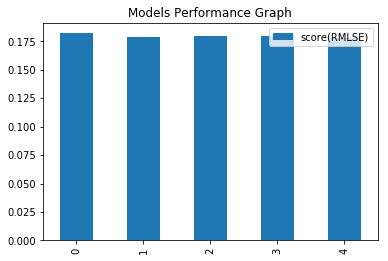

In [113]:
models.plot(title="Models Performance Graph",kind="bar")